<a href="https://colab.research.google.com/github/Duyih25/btvn_lab/blob/main/All_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOAD DATA


In [32]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

import seaborn as sns
from matplotlib.pyplot import figure

from tensorflow import keras
from tensorflow.keras import layers
import math
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
data = pd.read_csv('/content/drive/MyDrive/churn/sub_model_t5.csv')

data2 = pd.read_csv('/content/drive/MyDrive/churn/sub_model_t6.csv')

In [3]:
print(data.head(5))
print(data2.head(5))


       ISDN  PRODUCT_CODE   AGE  PROVINCE  ... 15c3d_2  15c3d_3  15c3d_4  15c3d_5
0  10000001      10000001   147  10000001  ...       0        1        0        0
1  10000002      10000001   154  10000002  ...       1        1        1        0
2  10000003      10000001   248  10000006  ...       0        1        0        1
3  10000004      10000001   131  10000001  ...       0        1        1        1
4  10000005      10000001  1467  10000001  ...       0        1        1        1

[5 rows x 53 columns]
        ISDN  PRODUCT_CODE  AGE    PROVINCE  ... 15c3d_3  15c3d_4  15c3d_5  15c3d_6
0  100000000    1204123013  201  4313434240  ...       1        1        1        1
1  100000001    1204123013  882  4313434249  ...       1        1        1        1
2  100000002    1204123017  123  4313434254  ...       0        1        1        0
3  100000003    1204123013  123  4313434250  ...       0        1        0        0
4  100000004    1204123013  748  4313434250  ...       1        1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ISDN          100000 non-null  int64  
 1   PRODUCT_CODE  100000 non-null  int64  
 2   AGE           100000 non-null  int64  
 3   PROVINCE      100000 non-null  int64  
 4   OS            99929 non-null   object 
 5   TD_2          100000 non-null  float64
 6   TD_3          100000 non-null  float64
 7   TD_4          100000 non-null  float64
 8   TD_5          100000 non-null  float64
 9   DATA_2        100000 non-null  float64
 10  DATA_3        100000 non-null  float64
 11  DATA_4        100000 non-null  float64
 12  DATA_5        100000 non-null  float64
 13  ONNET_IN_2    100000 non-null  float64
 14  ONNET_IN_3    100000 non-null  float64
 15  ONNET_IN_4    100000 non-null  float64
 16  ONNET_IN_5    100000 non-null  float64
 17  ONNET_OUT_2   100000 non-null  float64
 18  ONNET

In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ISDN          100000 non-null  int64  
 1   PRODUCT_CODE  100000 non-null  int64  
 2   AGE           100000 non-null  int64  
 3   PROVINCE      100000 non-null  int64  
 4   OS            99943 non-null   object 
 5   TD_3          100000 non-null  float64
 6   TD_4          100000 non-null  float64
 7   TD_5          100000 non-null  float64
 8   TD_6          100000 non-null  float64
 9   DATA_3        100000 non-null  float64
 10  DATA_4        100000 non-null  float64
 11  DATA_5        100000 non-null  float64
 12  DATA_6        100000 non-null  float64
 13  ONNET_IN_3    100000 non-null  float64
 14  ONNET_IN_4    100000 non-null  float64
 15  ONNET_IN_5    100000 non-null  float64
 16  ONNET_IN_6    100000 non-null  float64
 17  ONNET_OUT_3   100000 non-null  float64
 18  ONNET

## DATA VISUALIZATION


In [6]:
# Scatter plot for all columns

### scatter plot function
def plot_scatter(df, ft, k):
    fig = plt.figure(figsize = (15,8))
    k -= 1
    for i in range(2 + k,6 + k):
        ax = fig.add_subplot(2,2,i-1-k)
        ax.scatter(x = df["ISDN"], y = df[ft + "_" + str(i)])
        ax.set_title(ft + " in month " + str(i))

    plt.show()


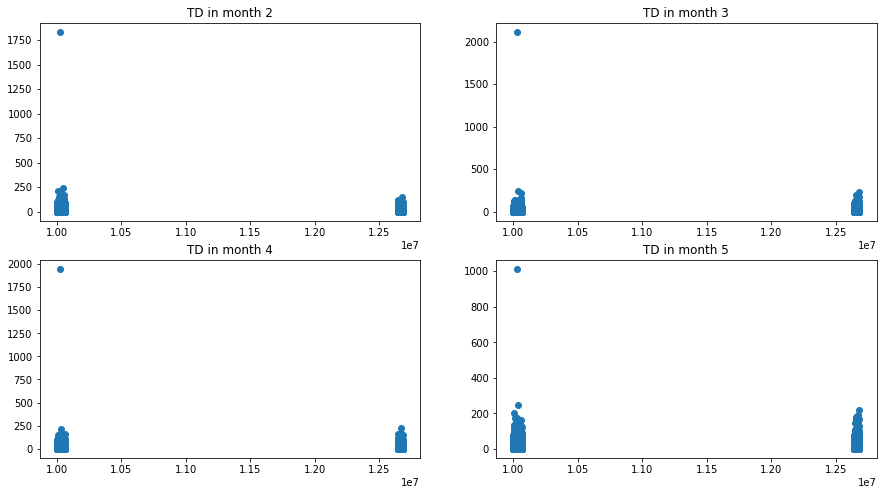

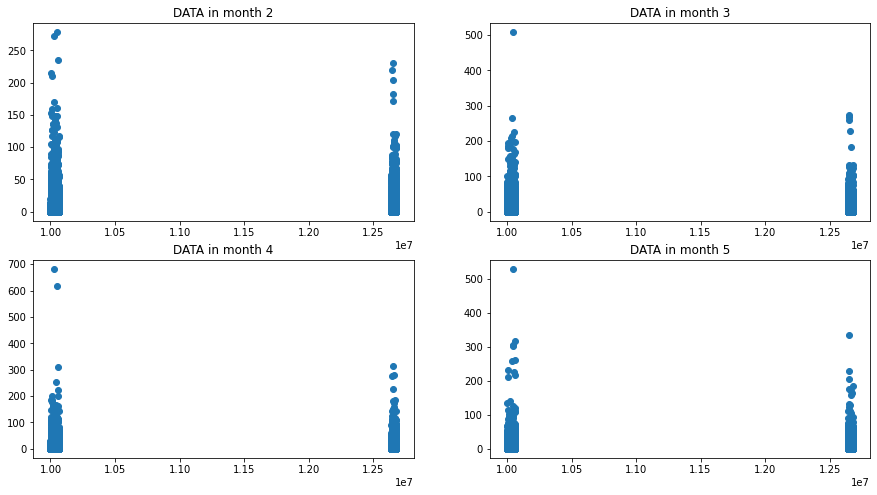

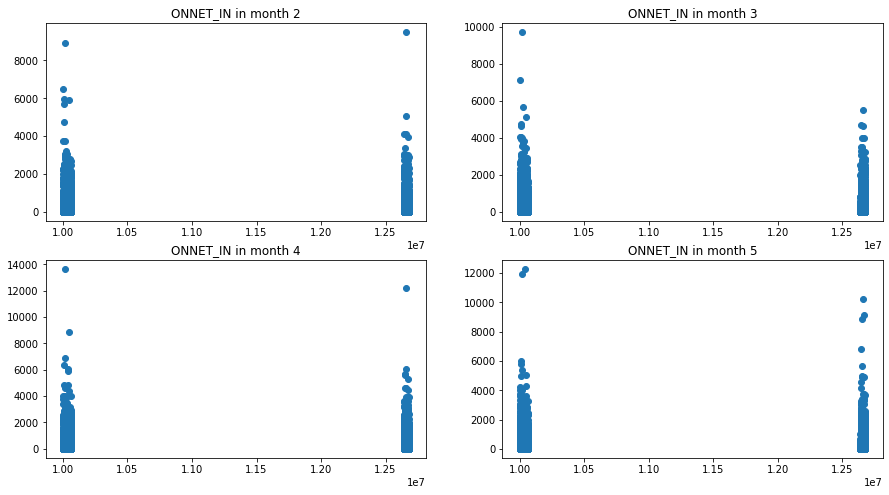

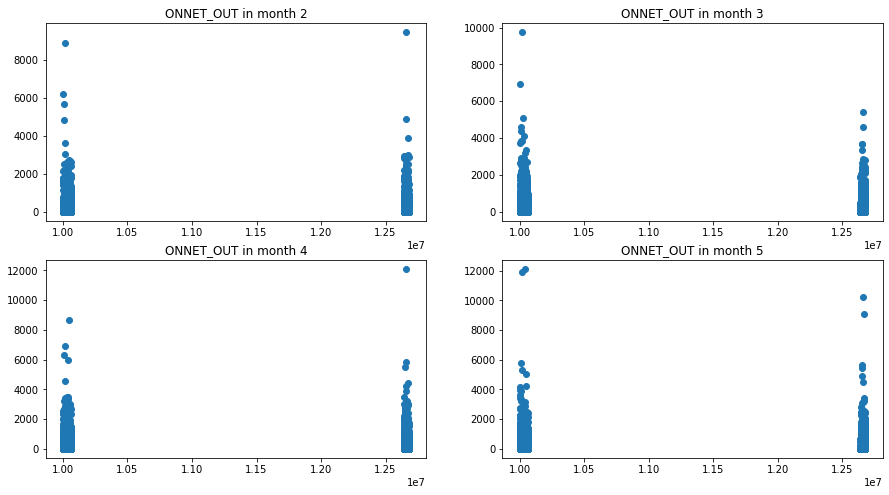

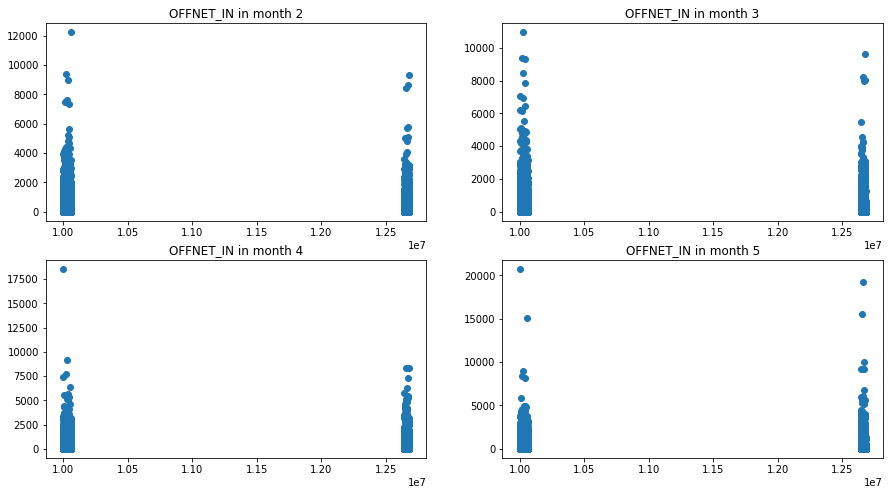

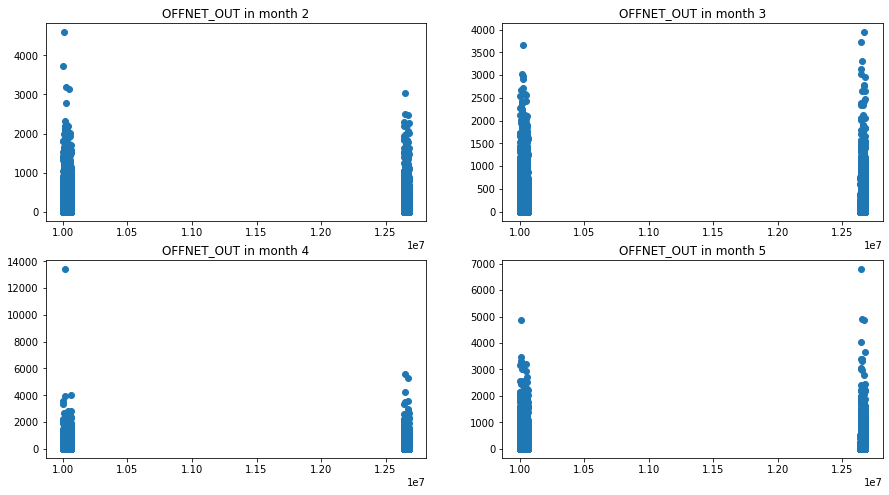

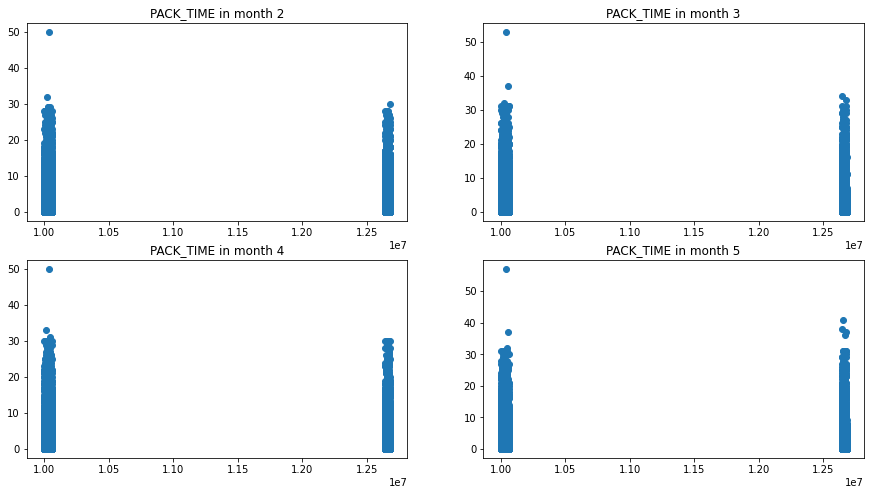

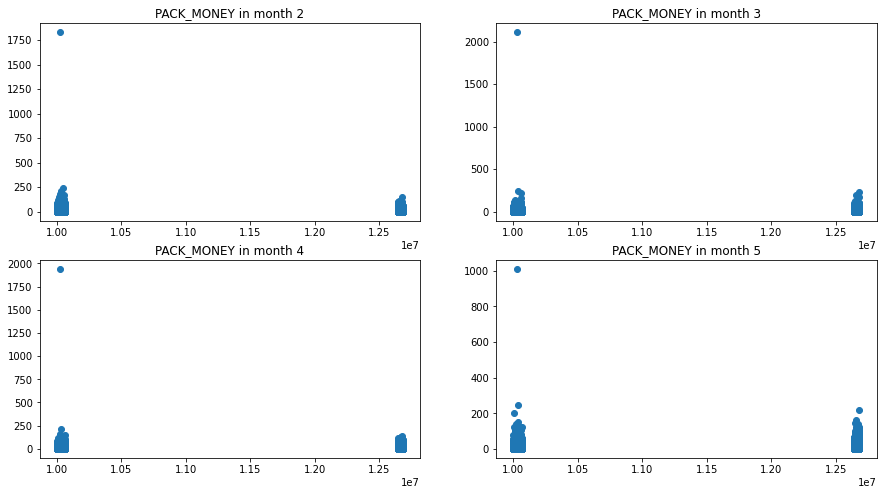

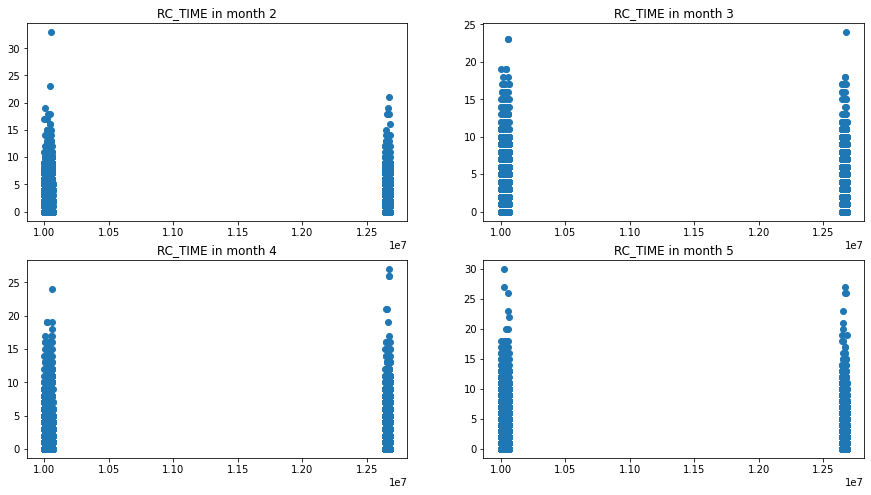

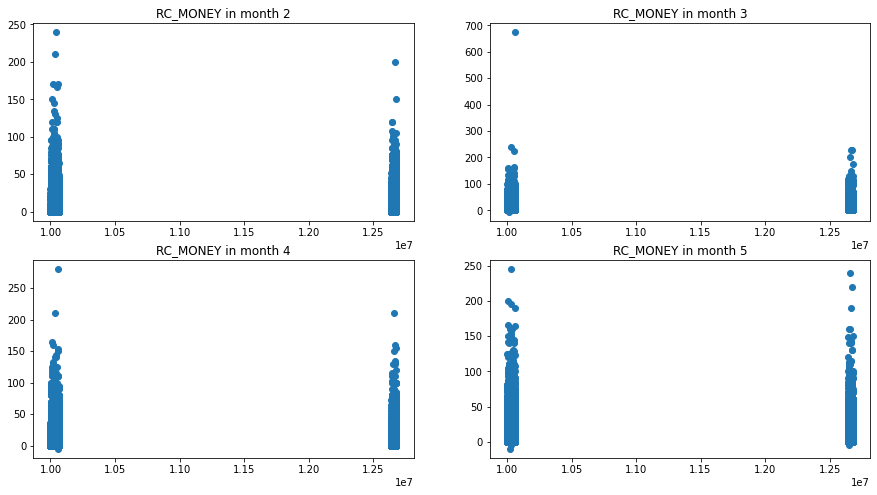

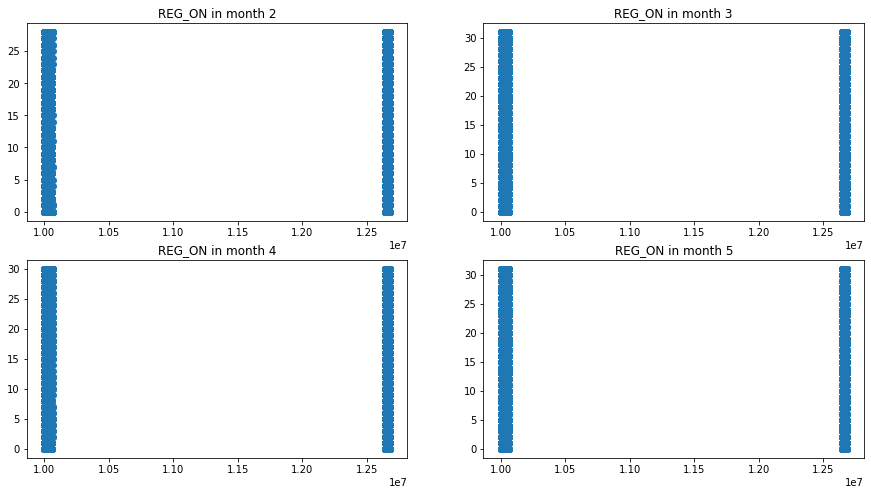

In [7]:
# all columns in data (t5)

plot_scatter(data,"TD",1)
plot_scatter(data,"DATA",1)
plot_scatter(data,"ONNET_IN",1)
plot_scatter(data,"ONNET_OUT",1)
plot_scatter(data,"OFFNET_IN",1)
plot_scatter(data,"OFFNET_OUT",1)
plot_scatter(data,"PACK_TIME",1)
plot_scatter(data,"PACK_MONEY",1)
plot_scatter(data,"RC_TIME",1)
plot_scatter(data,"RC_MONEY",1)
plot_scatter(data,"REG_ON",1)

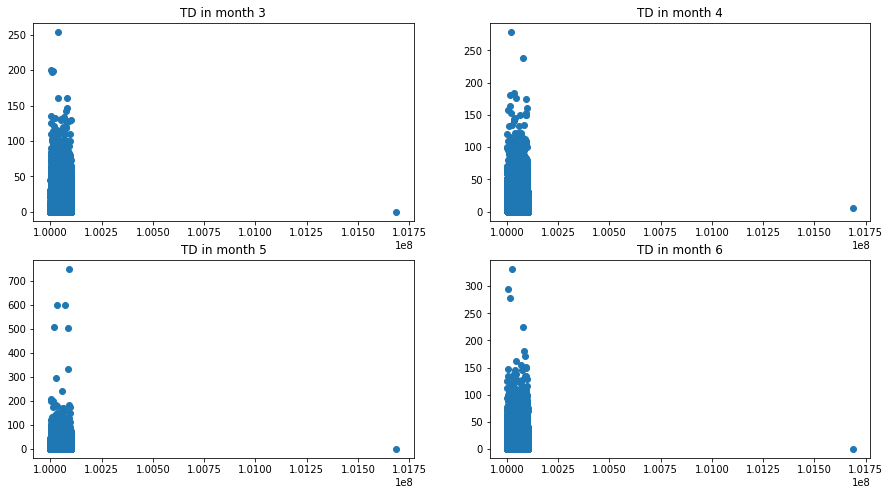

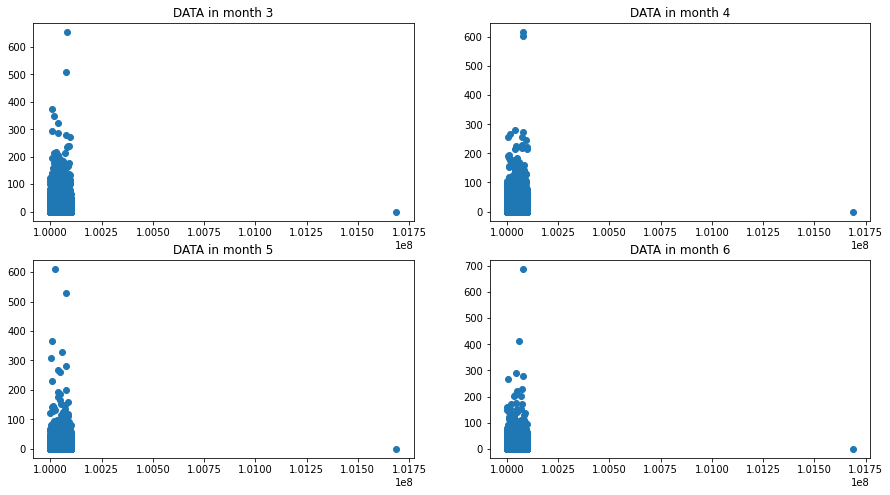

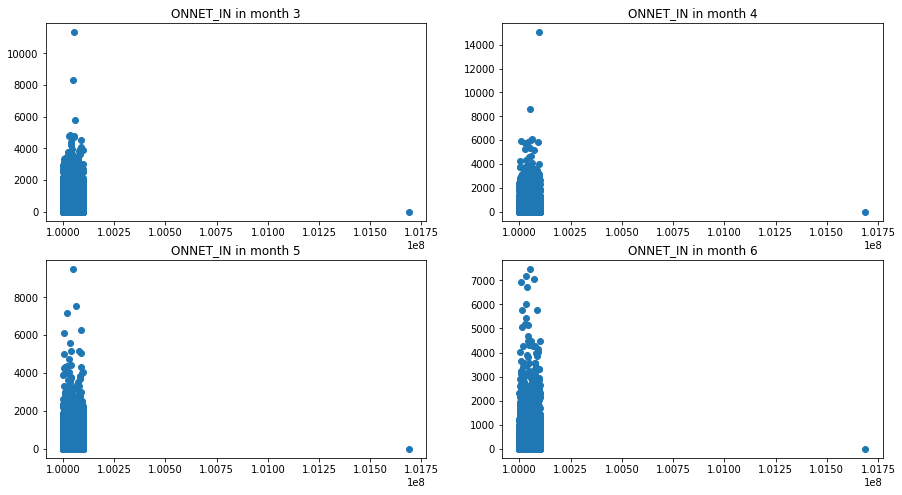

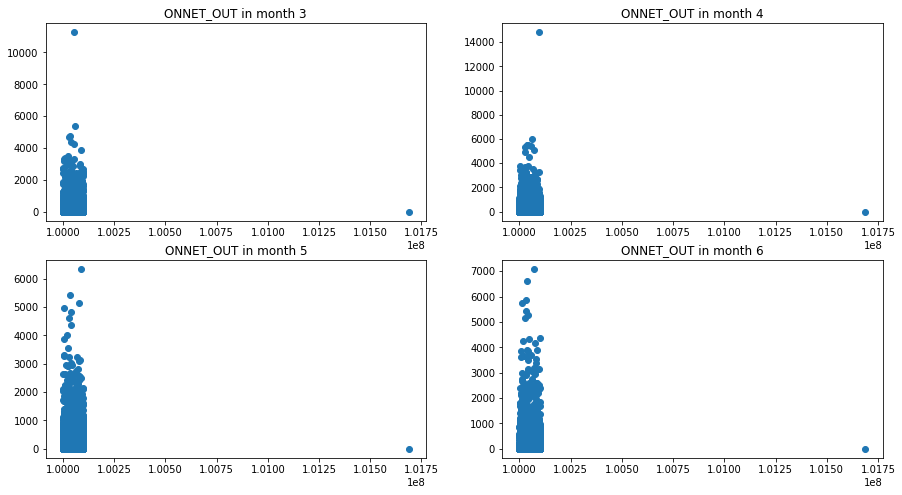

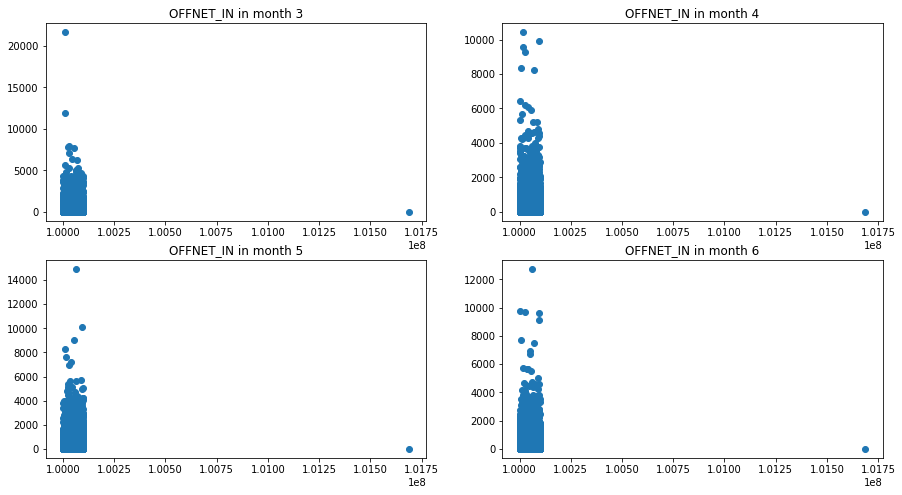

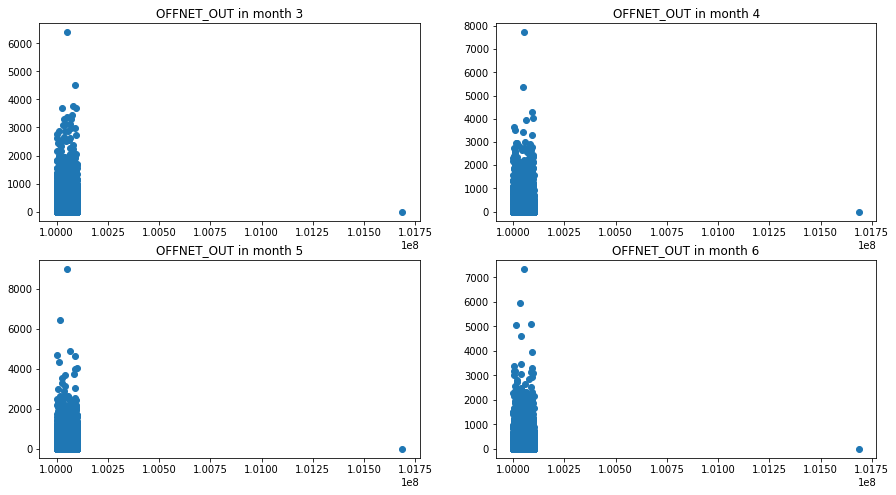

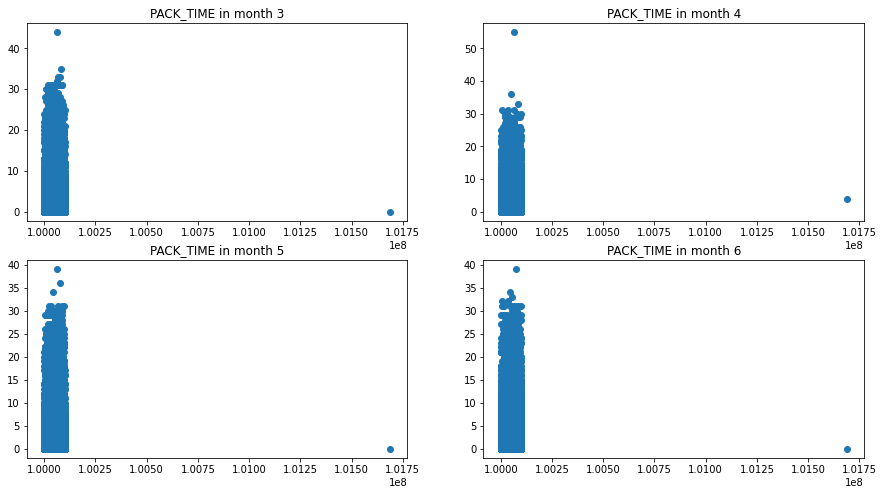

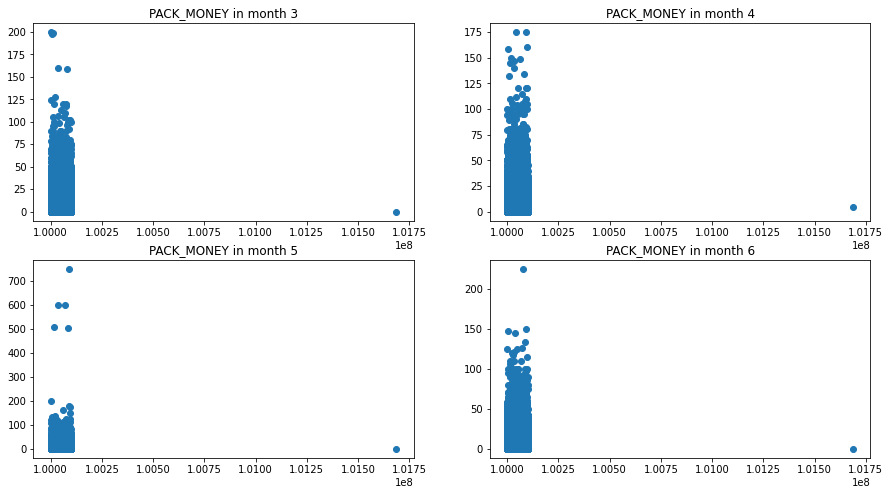

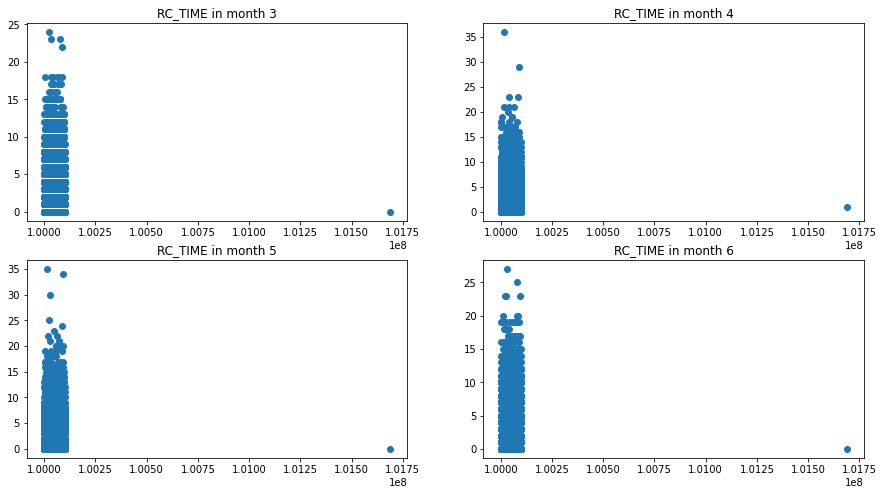

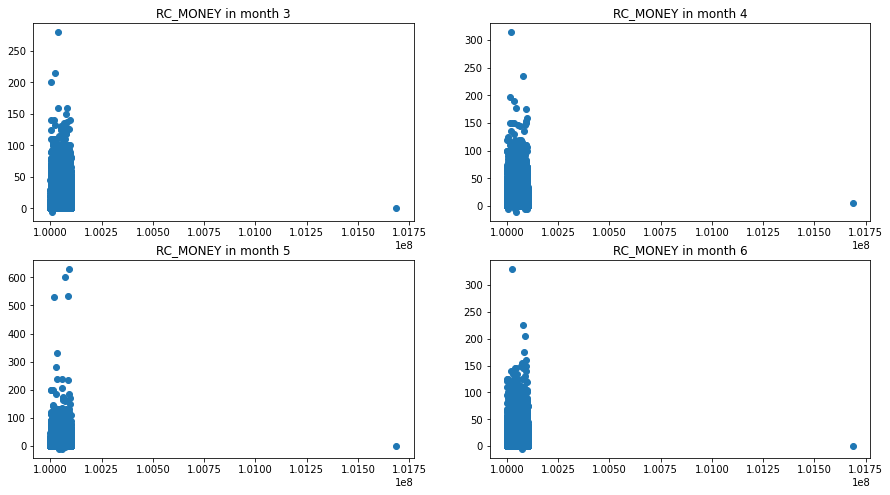

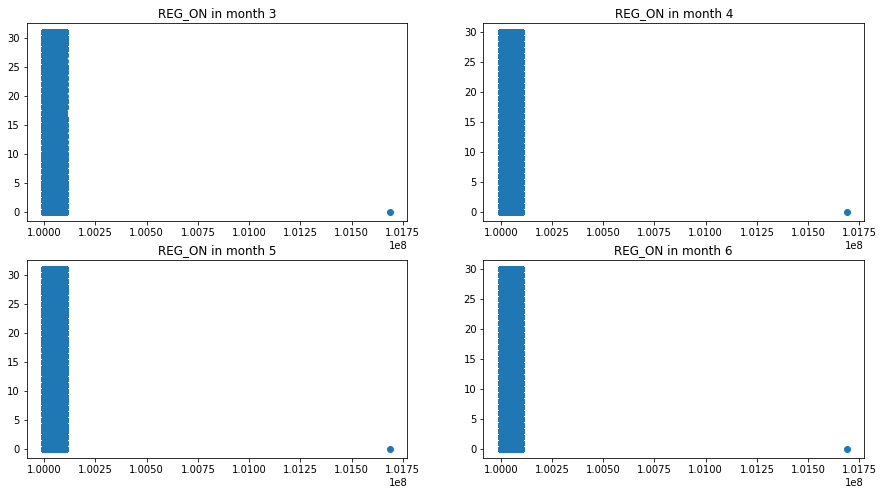

In [8]:
# all columns in data2 (t6)

plot_scatter(data2,"TD",2)
plot_scatter(data2,"DATA",2)
plot_scatter(data2,"ONNET_IN",2)
plot_scatter(data2,"ONNET_OUT",2)
plot_scatter(data2,"OFFNET_IN",2)
plot_scatter(data2,"OFFNET_OUT",2)
plot_scatter(data2,"PACK_TIME",2)
plot_scatter(data2,"PACK_MONEY",2)
plot_scatter(data2,"RC_TIME",2)
plot_scatter(data2,"RC_MONEY",2)
plot_scatter(data2,"REG_ON",2)

## DATA PREPROCESSING

### DATA CLEANING

#### DROP OUTLIERS

In [9]:
for i in range(2,6):
  data = data[data['RC_MONEY_' + str(i)] >= 0]
  data2 = data2[data2['RC_MONEY_' + str(i+1)] >= 0]

print(data.shape)
print(data2.shape)  


(99995, 53)
(99988, 53)


#### FILLING NULL DATA

In [10]:
data['OS'].fillna("Unknow", inplace = True)
data2['OS'].fillna("Unknow", inplace = True)

print(data.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99995 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ISDN          99995 non-null  int64  
 1   PRODUCT_CODE  99995 non-null  int64  
 2   AGE           99995 non-null  int64  
 3   PROVINCE      99995 non-null  int64  
 4   OS            99995 non-null  object 
 5   TD_2          99995 non-null  float64
 6   TD_3          99995 non-null  float64
 7   TD_4          99995 non-null  float64
 8   TD_5          99995 non-null  float64
 9   DATA_2        99995 non-null  float64
 10  DATA_3        99995 non-null  float64
 11  DATA_4        99995 non-null  float64
 12  DATA_5        99995 non-null  float64
 13  ONNET_IN_2    99995 non-null  float64
 14  ONNET_IN_3    99995 non-null  float64
 15  ONNET_IN_4    99995 non-null  float64
 16  ONNET_IN_5    99995 non-null  float64
 17  ONNET_OUT_2   99995 non-null  float64
 18  ONNET_OUT_3   99995 non-nu

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### DATA WRANGLING

#### ENCODING DATA

In [11]:
data = pd.get_dummies(data)
data2 = pd.get_dummies(data2)

data.drop('OS_Unknow', axis = 1, inplace = True)
data2.drop('OS_Unknow', axis =1, inplace = True)


### DATA TRANSFORMATION

In [12]:
from sklearn.preprocessing import MinMaxScaler

data2.drop('ISDN', axis = 1, inplace = True)
data.drop('ISDN', axis = 1, inplace = True)

scaler = MinMaxScaler(feature_range = (0,1))

tmp = scaler.fit_transform(data[data.drop(['15c3d_5','15c3d_2','15c3d_3','15c3d_4','OS_FF','OS_SM'], axis=1).columns])
data[data.drop(['15c3d_5','15c3d_2','15c3d_3','15c3d_4','OS_FF','OS_SM'], axis=1).columns] = tmp
print(data.head())

tmp = scaler.fit_transform(data2[data2.drop(['15c3d_5','15c3d_6','15c3d_3','15c3d_4','OS_FF','OS_SM'], axis=1).columns])
data2[data2.drop(['15c3d_6','15c3d_5','15c3d_3','15c3d_4','OS_FF','OS_SM'], axis=1).columns] = tmp

print(data2.head())

   PRODUCT_CODE       AGE  PROVINCE      TD_2  ...  15c3d_4  15c3d_5  OS_FF  OS_SM
0           0.0  0.057534      0.00  0.000000  ...        0        0      0      1
1           0.0  0.060274      0.04  0.000715  ...        1        0      0      1
2           0.0  0.097065      0.20  0.000149  ...        0        1      1      0
3           0.0  0.051272      0.00  0.000000  ...        1        1      0      1
4           0.0  0.574168      0.00  0.000000  ...        1        1      0      0

[5 rows x 53 columns]
   PRODUCT_CODE       AGE  PROVINCE      TD_3  ...  15c3d_5  15c3d_6  OS_FF  OS_SM
0          0.00  0.077397      0.28  0.039347  ...        1        1      0      1
1          0.00  0.339623      0.64  0.025182  ...        1        1      0      1
2          0.16  0.047362      0.84  0.000000  ...        1        0      0      1
3          0.00  0.047362      0.68  0.000000  ...        0        0      0      1
4          0.00  0.288025      0.68  0.047154  ...        1     

### FEATURE SELECTION


In [13]:
data.drop('TD_5', axis= 1, inplace= True)
data.drop('DATA_5', axis= 1, inplace= True)
data.drop('ONNET_IN_5', axis= 1, inplace= True)
data.drop('ONNET_OUT_5', axis= 1, inplace= True)
data.drop('OFFNET_IN_5', axis= 1, inplace= True)
data.drop('OFFNET_OUT_5', axis= 1, inplace= True)
data.drop('PACK_TIME_5', axis= 1, inplace= True)
data.drop('PACK_MONEY_5', axis= 1, inplace= True)
data.drop('RC_TIME_5', axis= 1, inplace= True)
data.drop('RC_MONEY_5', axis= 1, inplace= True)
data.drop('REG_ON_5', axis= 1, inplace= True)

data2.drop('TD_6', axis= 1, inplace= True)
data2.drop('DATA_6', axis= 1, inplace= True)
data2.drop('ONNET_IN_6', axis= 1, inplace= True)
data2.drop('ONNET_OUT_6', axis= 1, inplace= True)
data2.drop('OFFNET_IN_6', axis= 1, inplace= True)
data2.drop('OFFNET_OUT_6', axis= 1, inplace= True)
data2.drop('PACK_TIME_6', axis= 1, inplace= True)
data2.drop('PACK_MONEY_6', axis= 1, inplace= True)
data2.drop('RC_TIME_6', axis= 1, inplace= True)
data2.drop('RC_MONEY_6', axis= 1, inplace= True)
data2.drop('REG_ON_6', axis= 1, inplace= True)


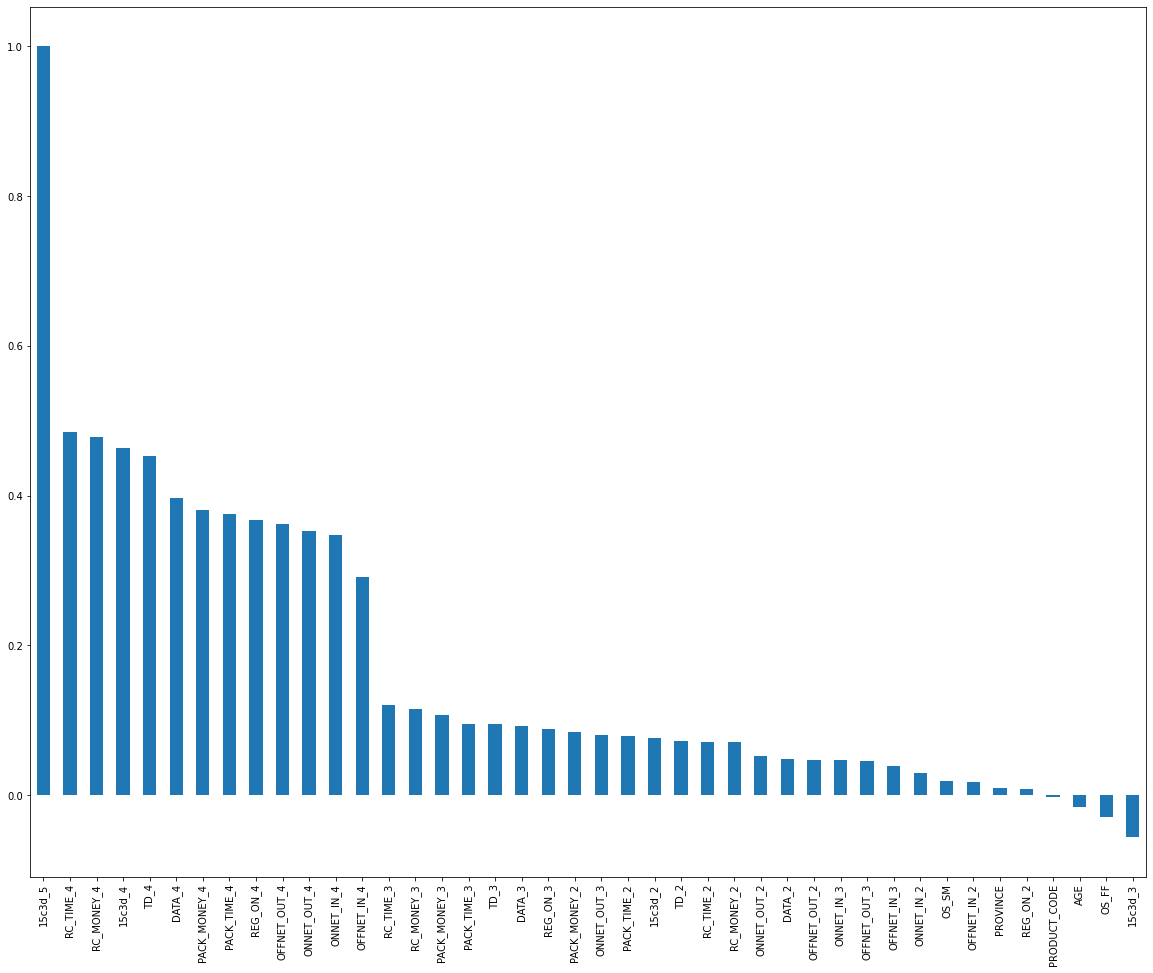

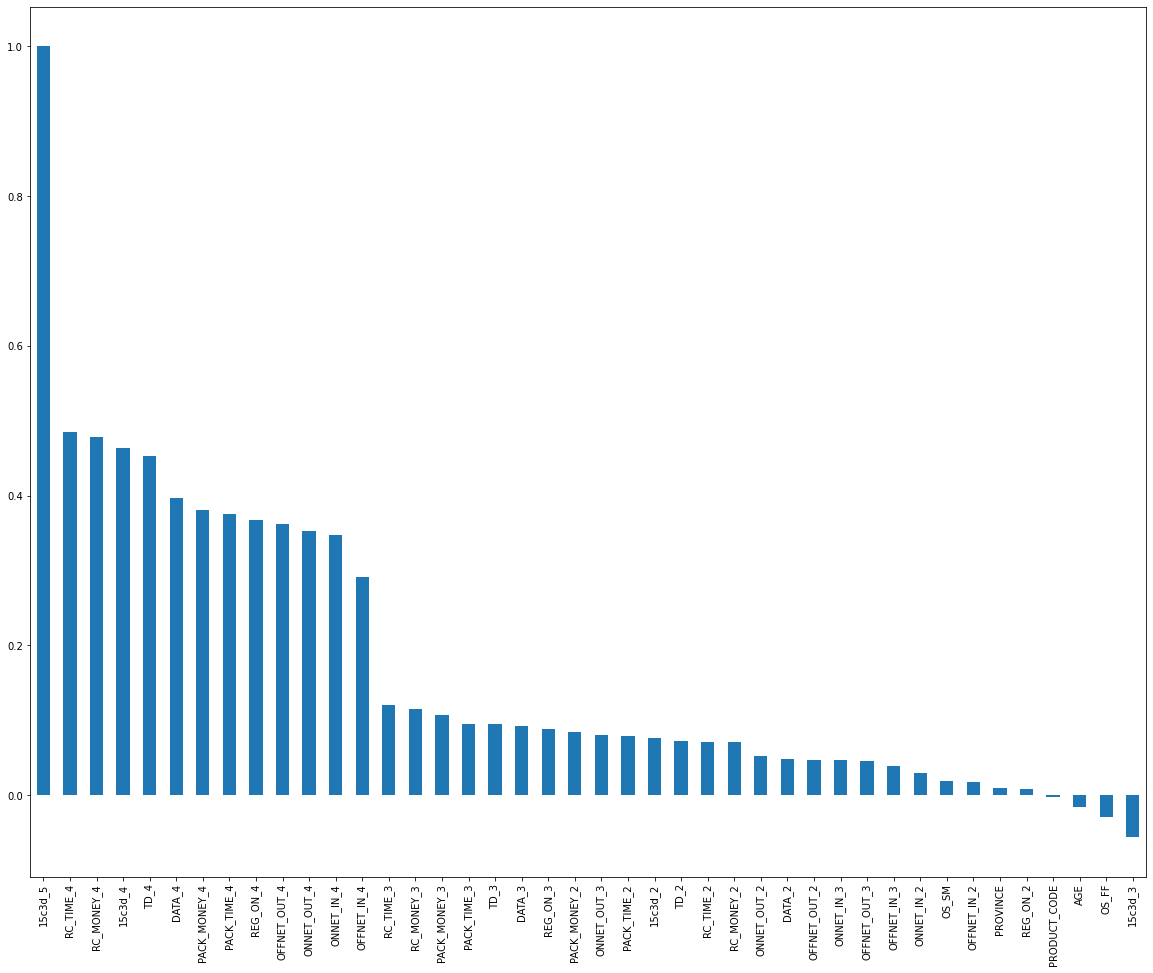

In [14]:
# corr by kendall
plt.figure(figsize = (20,16))        # Size of the figure
data.corr(method = "kendall")['15c3d_5'].sort_values(ascending = False).plot(kind='bar');
plt.show()

plt.figure(figsize = (20,16))        # Size of the figure
data.corr(method = "kendall")['15c3d_5'].sort_values(ascending = False).plot(kind='bar');
plt.show()


41


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

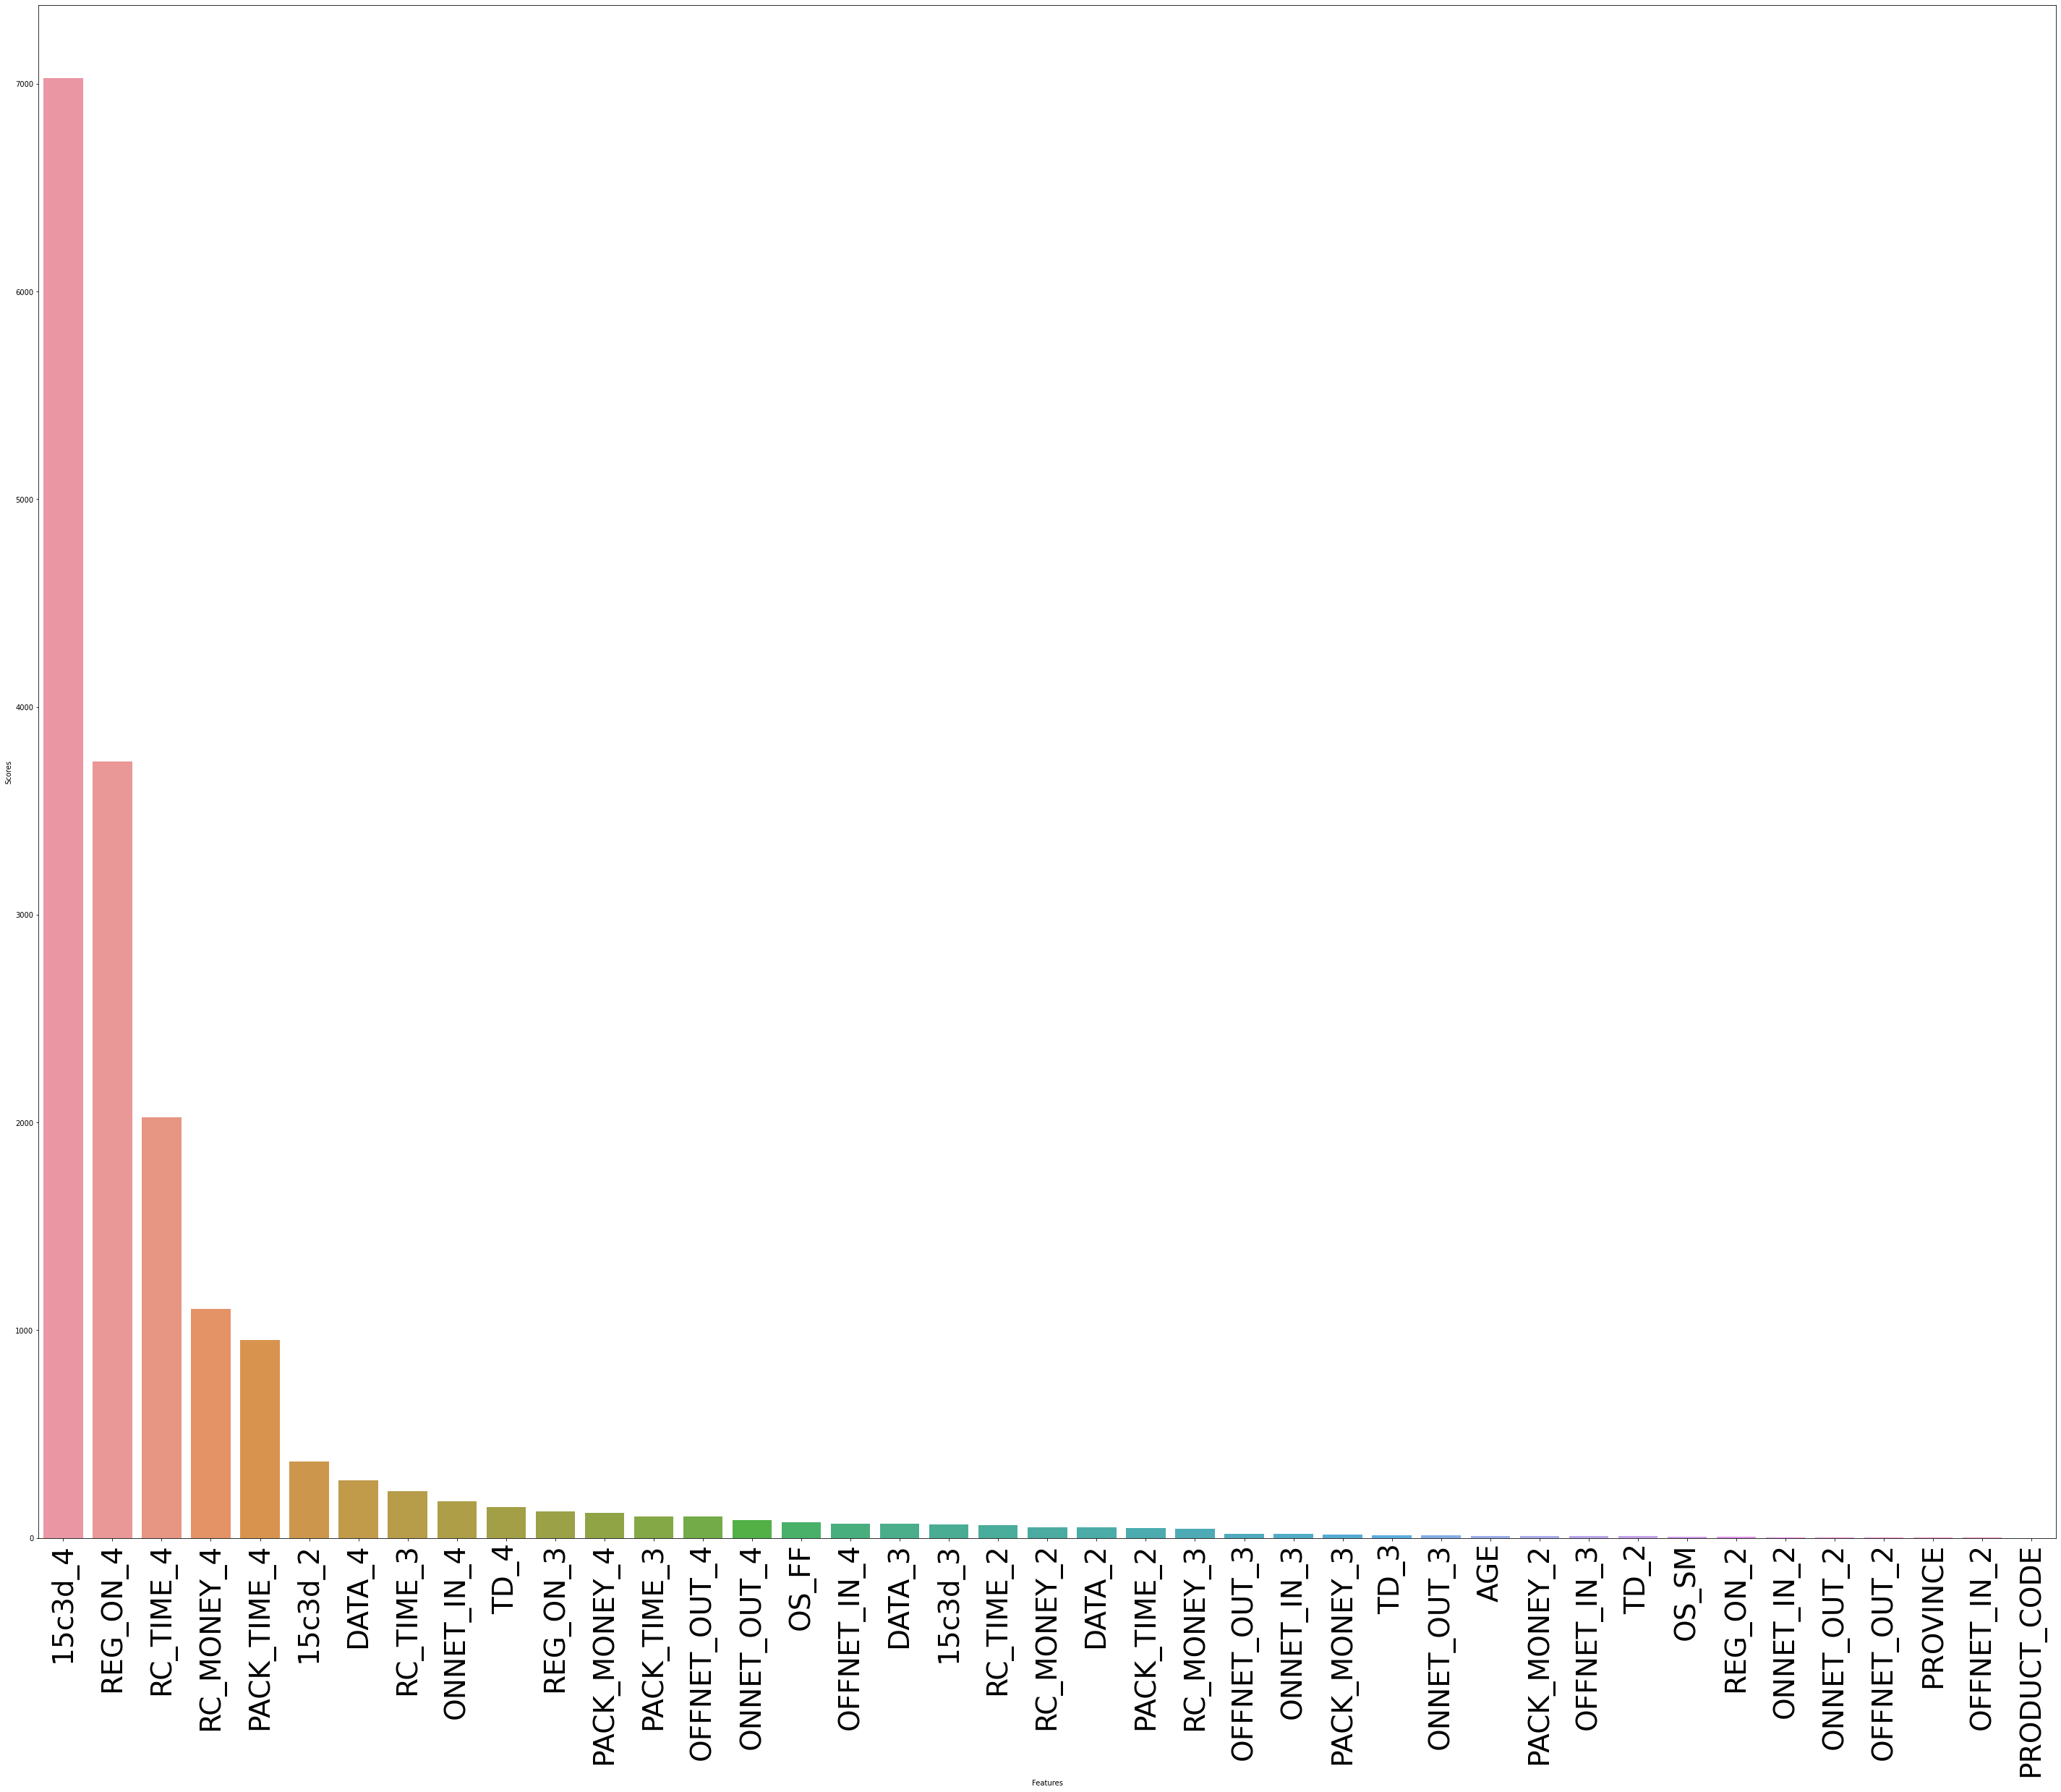

In [15]:
### corr by chi-squared

#t5
a = data.drop('15c3d_5', axis = 1)
b = data['15c3d_5']

test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(a, b)

print(fit.scores_.size)

tmp = {'Features':data.drop('15c3d_5',axis = 1).columns,
        'Scores':fit.scores_}

df = pd.DataFrame(tmp)

plt.figure(figsize=(50, 39))
# make barplot and sort bars
sns.barplot(x='Features',
            y='Scores', 
            data=df, 
            order=df.sort_values('Scores', ascending = False).Features)

plt.xticks(fontsize = 39, rotation=90)

41


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

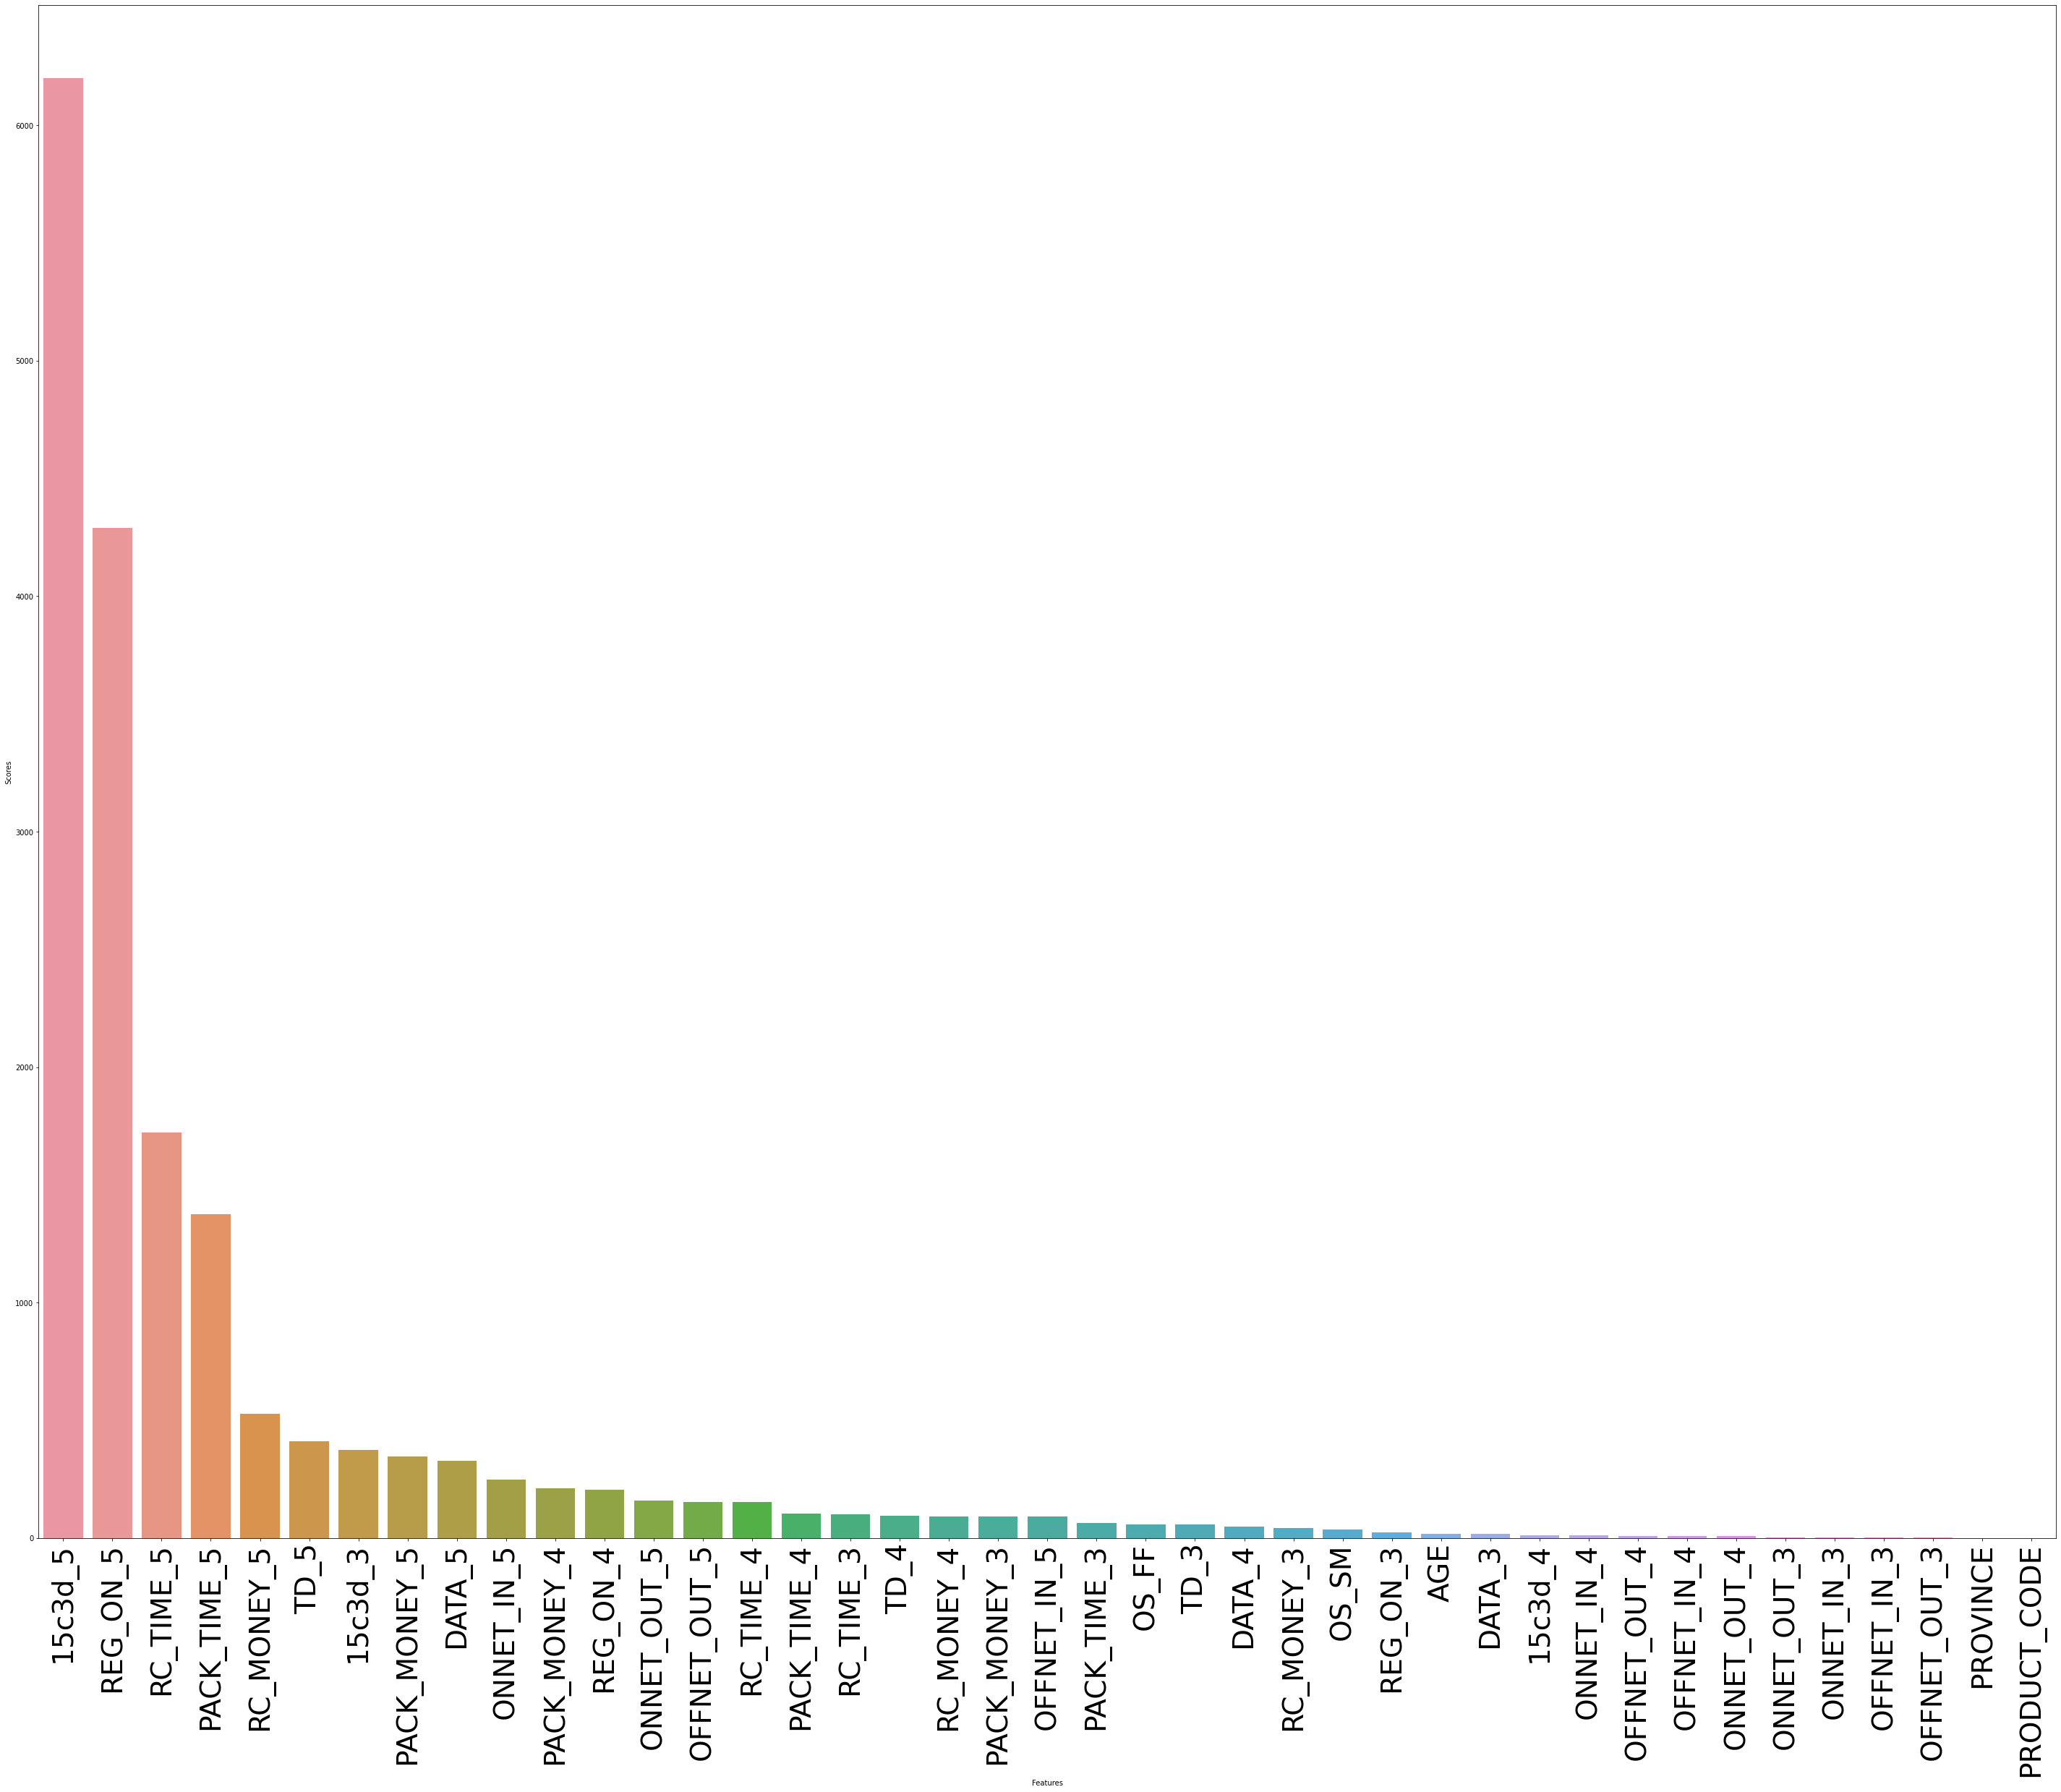

In [16]:
#t6
a = data2.drop('15c3d_6', axis = 1)
b = data2['15c3d_6']

test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(a, b)

print(fit.scores_.size)

tmp = {'Features':data2.drop('15c3d_6',axis = 1).columns,
        'Scores':fit.scores_}

df = pd.DataFrame(tmp)

plt.figure(figsize=(50, 39))
# make barplot and sort bars
sns.barplot(x='Features',
            y='Scores', 
            data=df, 
            order=df.sort_values('Scores', ascending = False).Features)

plt.xticks(fontsize = 39, rotation=90)

In [17]:
# DROP PROVINCE AND PRODUCT_CODE COLUMNS

data.drop(['PROVINCE', 'PRODUCT_CODE'], axis= 1, inplace= True)
data2.drop(['PROVINCE', 'PRODUCT_CODE'], axis= 1, inplace= True)

print(data.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99995 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE           99995 non-null  float64
 1   TD_2          99995 non-null  float64
 2   TD_3          99995 non-null  float64
 3   TD_4          99995 non-null  float64
 4   DATA_2        99995 non-null  float64
 5   DATA_3        99995 non-null  float64
 6   DATA_4        99995 non-null  float64
 7   ONNET_IN_2    99995 non-null  float64
 8   ONNET_IN_3    99995 non-null  float64
 9   ONNET_IN_4    99995 non-null  float64
 10  ONNET_OUT_2   99995 non-null  float64
 11  ONNET_OUT_3   99995 non-null  float64
 12  ONNET_OUT_4   99995 non-null  float64
 13  OFFNET_IN_2   99995 non-null  float64
 14  OFFNET_IN_3   99995 non-null  float64
 15  OFFNET_IN_4   99995 non-null  float64
 16  OFFNET_OUT_2  99995 non-null  float64
 17  OFFNET_OUT_3  99995 non-null  float64
 18  OFFNET_OUT_4  99995 non-nu

## BUILDING MODELS

In [18]:
# divide test set and training set

X = data.drop("15c3d_5", axis= 1)
y = data['15c3d_5']

X2 = data2.drop("15c3d_6", axis=1)
y2 = data2['15c3d_6']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size= 0.2, random_state= 42)

### LOGISTIC REGRESSION

In [19]:
#t5
logreg=LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)

logreg.fit(X_train, y_train) 
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.5f'%(score))
print("Test set accuracy: ", '%.5f'%(score2))

y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training set accuracy:  0.75631
Test set accuracy:  0.75539
[[6567 2696]
 [2196 8540]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      9263
           1       0.76      0.80      0.78     10736

    accuracy                           0.76     19999
   macro avg       0.75      0.75      0.75     19999
weighted avg       0.76      0.76      0.75     19999



In [20]:
#t6
logreg=LogisticRegression(max_iter=10000)
logreg.fit(X_train2,y_train2)

logreg.fit(X_train2, y_train2) 
score = logreg.score(X_train2, y_train2)
score2 = logreg.score(X_test2, y_test2)

print("Training set accuracy: ", '%.5f'%(score))
print("Test set accuracy: ", '%.5f'%(score2))

y_pred2 = logreg.predict(X_test2)
print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))

Training set accuracy:  0.76177
Test set accuracy:  0.76598
[[7868 2523]
 [2157 7450]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     10391
           1       0.75      0.78      0.76      9607

    accuracy                           0.77     19998
   macro avg       0.77      0.77      0.77     19998
weighted avg       0.77      0.77      0.77     19998



### XGBOOSTING

In [21]:
#T5

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_model.fit(X_train, y_train) 
score = xgb_model.score(X_train, y_train)
score2 = xgb_model.score(X_test, y_test)

print("Training set accuracy: ", '%.5f'%(score))
print("Test set accuracy: ", '%.5f'%(score2))

y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training set accuracy:  0.78368
Test set accuracy:  0.78089
[[6965 2298]
 [2084 8652]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      9263
           1       0.79      0.81      0.80     10736

    accuracy                           0.78     19999
   macro avg       0.78      0.78      0.78     19999
weighted avg       0.78      0.78      0.78     19999



In [22]:
# T6

xgb_model = XGBClassifier()
xgb_model.fit(X_train2, y_train2)

xgb_model.fit(X_train2, y_train2) 
score = xgb_model.score(X_train2, y_train2)
score2 = xgb_model.score(X_test2, y_test2)

print("Training set accuracy: ", '%.5f'%(score))
print("Test set accuracy: ", '%.5f'%(score2))

y_pred2 = xgb_model.predict(X_test2)
print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))

Training set accuracy:  0.79102
Test set accuracy:  0.79343
[[8426 1965]
 [2166 7441]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     10391
           1       0.79      0.77      0.78      9607

    accuracy                           0.79     19998
   macro avg       0.79      0.79      0.79     19998
weighted avg       0.79      0.79      0.79     19998



### GRADIENT BOOSTING

In [23]:
#t5

gb = GradientBoostingClassifier(n_estimators=125,max_depth=5)
gb.fit(X_train, y_train) 
score = gb.score(X_train, y_train)
score2 = gb.score(X_test, y_test)

print("Training set accuracy: ", '%.5f'%(score))
print("Test set accuracy: ", '%.5f'%(score2))

y_pred = gb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training set accuracy:  0.80099
Test set accuracy:  0.78554
[[7056 2207]
 [2082 8654]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      9263
           1       0.80      0.81      0.80     10736

    accuracy                           0.79     19999
   macro avg       0.78      0.78      0.78     19999
weighted avg       0.79      0.79      0.79     19999



In [24]:
#t6

gb = GradientBoostingClassifier(n_estimators=125,max_depth=5)
gb.fit(X_train2, y_train2) 
score = gb.score(X_train2, y_train2)
score2 = gb.score(X_test2, y_test2)

print("Training set accuracy: ", '%.5f'%(score))
print("Test set accuracy: ", '%.5f'%(score2))

y_pred2 = gb.predict(X_test2)
print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))

Training set accuracy:  0.80664
Test set accuracy:  0.79888
[[8457 1934]
 [2088 7519]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     10391
           1       0.80      0.78      0.79      9607

    accuracy                           0.80     19998
   macro avg       0.80      0.80      0.80     19998
weighted avg       0.80      0.80      0.80     19998



### RANDOM FOREST

In [25]:
#t5

rf = RandomForestClassifier(n_estimators=1200, max_depth=80, n_jobs =-1, min_samples_leaf=1,
                                min_samples_split= 10, max_features = 'auto', criterion = 'entropy', bootstrap= True,
                              random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)

print("Training set accuracy: ", '%.5f'%(score))
print("Test set accuracy: ", '%.5f'%(score2))

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training set accuracy:  0.96754
Test set accuracy:  0.78334
[[6984 2279]
 [2054 8682]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      9263
           1       0.79      0.81      0.80     10736

    accuracy                           0.78     19999
   macro avg       0.78      0.78      0.78     19999
weighted avg       0.78      0.78      0.78     19999



In [26]:
#t6

rf = RandomForestClassifier(n_estimators=1200, max_depth=80, n_jobs =-1, min_samples_leaf=1,
                                min_samples_split= 10, max_features = 'auto', criterion = 'entropy', bootstrap= True,
                              random_state=42)
rf.fit(X_train2, y_train2) 
score = rf.score(X_train2, y_train2)
score2 = rf.score(X_test2, y_test2)

print("Training set accuracy: ", '%.5f'%(score))
print("Test set accuracy: ", '%.5f'%(score2))

y_pred2 = rf.predict(X_test2)
print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))

Training set accuracy:  0.96928
Test set accuracy:  0.79753
[[8433 1958]
 [2091 7516]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     10391
           1       0.79      0.78      0.79      9607

    accuracy                           0.80     19998
   macro avg       0.80      0.80      0.80     19998
weighted avg       0.80      0.80      0.80     19998



### DEEP NEURAL DECISION FOREST

In [28]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train['15c3d_5'] = data_train['15c3d_5'].astype(str)
data_train['15c3d_5'].replace(["0", "1"], ["y", "n"], inplace= True)

data_test = pd.concat([X_test, y_test], axis=1)
data_test['15c3d_5'] = data_test['15c3d_5'].astype(str)
data_test['15c3d_5'].replace(["0", "1"], ["y", "n"], inplace= True)

data_train2 = pd.concat([X_train2, y_train2], axis=1)
data_train2['15c3d_6'] = data_train2['15c3d_6'].astype(str)
data_train2['15c3d_6'].replace(["0", "1"], ["y", "n"], inplace= True)

data_test2 = pd.concat([X_test2, y_test2], axis=1)
data_test2['15c3d_6'] = data_test2['15c3d_6'].astype(str)
data_test2['15c3d_6'].replace(["0", "1"], ["y", "n"], inplace= True)

data_train.to_csv("train.csv", index=False, header=False)
data_test.to_csv("test.csv", index=False, header=False)

data_train2.to_csv("train2.csv", index=False, header=False)
data_test2.to_csv("test2.csv", index=False, header=False)

In [29]:
print(data_train.head())
print(data_test2.head())

            AGE      TD_2      TD_3      TD_4  ...  15c3d_4  OS_FF  OS_SM  15c3d_5
92727  0.050881  0.000000  0.002366  0.000000  ...        0      0      1        y
25160  0.079843  0.000000  0.001916  0.000489  ...        0      0      1        y
38242  0.082975  0.002728  0.003786  0.012864  ...        1      0      1        n
3806   0.073581  0.000000  0.002363  0.000000  ...        0      0      1        y
67884  0.354990  0.000000  0.014196  0.012864  ...        1      0      1        n

[5 rows x 40 columns]
            AGE      TD_3      TD_4      TD_5  ...  15c3d_5  OS_FF  OS_SM  15c3d_6
33966  0.038506  0.000000  0.071823  0.026720  ...        1      0      1        n
96389  0.041201  0.000000  0.017956  0.006667  ...        1      0      1        n
19450  0.112437  0.000000  0.024494  0.002639  ...        1      0      1        n
9734   0.046207  0.000000  0.035911  0.010667  ...        1      0      1        n
7130   0.054678  0.059021  0.071820  0.017334  ...        1     

In [30]:
# A list of the numerical feature names.
NUMERIC_FEATURE_NAMES = data_train.drop("15c3d_5", axis=1).columns
# A dictionary of the categorical features and their vocabulary.
CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    
}
# A list of the columns to ignore from the dataset.
#IGNORE_COLUMN_NAMES = ["fnlwgt"]
# A list of the categorical feature names.
CATEGORICAL_FEATURE_NAMES = []
# A list of all the input features.
FEATURE_NAMES = NUMERIC_FEATURE_NAMES
# A list of column default values for each feature.
COLUMN_DEFAULTS = [
    [0.0] if feature_name in NUMERIC_FEATURE_NAMES else ["NA"]
    for feature_name in data_train.columns
]
# The name of the target feature.
TARGET_FEATURE_NAME = "15c3d_5"
# A list of the labels of the target features.
TARGET_LABELS = ["y", "n"]

In [33]:
from tensorflow.keras.layers import StringLookup

target_label_lookup = StringLookup(
    vocabulary=TARGET_LABELS, mask_token=None, num_oov_indices=0
)


def get_dataset_from_csv(csv_file_path, shuffle=False, batch_size=128):
    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=data_train.columns,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=False,
        na_value=" ",
        shuffle=shuffle,
    ).map(lambda features, target: (features, target_label_lookup(target)))
    return dataset.cache()

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [34]:
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.float32
            )
        else:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.string
            )
    return inputs

In [35]:
def encode_inputs(inputs):
    encoded_features = []
    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]
            # Create a lookup to convert a string values to an integer indices.
            # Since we are not using a mask token, nor expecting any out of vocabulary
            # (oov) token, we set mask_token to None and num_oov_indices to 0.
            lookup = StringLookup(
                vocabulary=vocabulary, mask_token=None, num_oov_indices=0
            )
            # Convert the string input values into integer indices.
            value_index = lookup(inputs[feature_name])
            embedding_dims = int(math.sqrt(lookup.vocabulary_size()))
            # Create an embedding layer with the specified dimensions.
            embedding = layers.Embedding(
                input_dim=lookup.vocabulary_size(), output_dim=embedding_dims
            )
            # Convert the index values to embedding representations.
            encoded_feature = embedding(value_index)
        else:
            # Use the numerical features as-is.
            encoded_feature = inputs[feature_name]
            if inputs[feature_name].shape[-1] is None:
                encoded_feature = tf.expand_dims(encoded_feature, -1)

        encoded_features.append(encoded_feature)

    encoded_features = layers.concatenate(encoded_features)
    return encoded_features

In [36]:
class NeuralDecisionTree(keras.Model):
    def __init__(self, depth, num_features, used_features_rate, num_classes):
        super(NeuralDecisionTree, self).__init__()
        self.depth = depth
        self.num_leaves = 2 ** depth
        self.num_classes = num_classes

        # Create a mask for the randomly selected features.
        num_used_features = int(num_features * used_features_rate)
        one_hot = np.eye(num_features)
        sampled_feature_indicies = np.random.choice(
            np.arange(num_features), num_used_features, replace=False
        )
        self.used_features_mask = one_hot[sampled_feature_indicies]

        # Initialize the weights of the classes in leaves.
        self.pi = tf.Variable(
            initial_value=tf.random_normal_initializer()(
                shape=[self.num_leaves, self.num_classes]
            ),
            dtype="float32",
            trainable=True,
        )

        # Initialize the stochastic routing layer.
        self.decision_fn = layers.Dense(
            units=self.num_leaves, activation="sigmoid", name="decision"
        )

    def call(self, features):
        batch_size = tf.shape(features)[0]

        # Apply the feature mask to the input features.
        features = tf.matmul(
            features, self.used_features_mask, transpose_b=True
        )  # [batch_size, num_used_features]
        # Compute the routing probabilities.
        decisions = tf.expand_dims(
            self.decision_fn(features), axis=2
        )  # [batch_size, num_leaves, 1]
        # Concatenate the routing probabilities with their complements.
        decisions = layers.concatenate(
            [decisions, 1 - decisions], axis=2
        )  # [batch_size, num_leaves, 2]

        mu = tf.ones([batch_size, 1, 1])

        begin_idx = 1
        end_idx = 2
        # Traverse the tree in breadth-first order.
        for level in range(self.depth):
            mu = tf.reshape(mu, [batch_size, -1, 1])  # [batch_size, 2 ** level, 1]
            mu = tf.tile(mu, (1, 1, 2))  # [batch_size, 2 ** level, 2]
            level_decisions = decisions[
                :, begin_idx:end_idx, :
            ]  # [batch_size, 2 ** level, 2]
            mu = mu * level_decisions  # [batch_size, 2**level, 2]
            begin_idx = end_idx
            end_idx = begin_idx + 2 ** (level + 1)

        mu = tf.reshape(mu, [batch_size, self.num_leaves])  # [batch_size, num_leaves]
        probabilities = keras.activations.softmax(self.pi)  # [num_leaves, num_classes]
        outputs = tf.matmul(mu, probabilities)  # [batch_size, num_classes]
        return outputs

In [37]:
class NeuralDecisionForest(keras.Model):
    def __init__(self, num_trees, depth, num_features, used_features_rate, num_classes):
        super(NeuralDecisionForest, self).__init__()
        self.ensemble = []
        # Initialize the ensemble by adding NeuralDecisionTree instances.
        # Each tree will have its own randomly selected input features to use.
        for _ in range(num_trees):
            self.ensemble.append(
                NeuralDecisionTree(depth, num_features, used_features_rate, num_classes)
            )

    def call(self, inputs):
        # Initialize the outputs: a [batch_size, num_classes] matrix of zeros.
        batch_size = tf.shape(inputs)[0]
        outputs = tf.zeros([batch_size, num_classes])

        # Aggregate the outputs of trees in the ensemble.
        for tree in self.ensemble:
            outputs += tree(inputs)
        # Divide the outputs by the ensemble size to get the average.
        outputs /= len(self.ensemble)
        return outputs

In [38]:
learning_rate = 0.01
batch_size = 265
num_epochs = 10
hidden_units = [64, 64]


def run_experiment(model):

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )

    print("Start training the model...")
    train_dataset = get_dataset_from_csv(
        "train.csv", shuffle=True, batch_size=batch_size
    )

    model.fit(train_dataset, epochs=num_epochs)
    print("Model training finished")

    print("Evaluating the model on the test data...")
    test_dataset = get_dataset_from_csv("test.csv", batch_size=batch_size)

    _, accuracy = model.evaluate(test_dataset)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

In [39]:
num_trees = 10
depth = 10
used_features_rate = 1.0
num_classes = len(TARGET_LABELS)


def create_tree_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)
    features = layers.BatchNormalization()(features)
    num_features = features.shape[1]

    tree = NeuralDecisionTree(depth, num_features, used_features_rate, num_classes)

    outputs = tree(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


tree_model = create_tree_model()
run_experiment(tree_model)

Start training the model...
Epoch 1/10
302/302 [==============================] - 14s 39ms/step - loss: 0.5067 - sparse_categorical_accuracy: 0.7554
Epoch 2/10
302/302 [==============================] - 10s 34ms/step - loss: 0.4766 - sparse_categorical_accuracy: 0.7702
Epoch 3/10
302/302 [==============================] - 21s 68ms/step - loss: 0.4727 - sparse_categorical_accuracy: 0.7728
Epoch 4/10
302/302 [==============================] - 15s 50ms/step - loss: 0.4700 - sparse_categorical_accuracy: 0.7745
Epoch 5/10
302/302 [==============================] - 11s 35ms/step - loss: 0.4680 - sparse_categorical_accuracy: 0.7754
Epoch 6/10
302/302 [==============================] - 10s 32ms/step - loss: 0.4659 - sparse_categorical_accuracy: 0.7765
Epoch 7/10
302/302 [==============================] - 10s 32ms/step - loss: 0.4638 - sparse_categorical_accuracy: 0.7781
Epoch 8/10
302/302 [==============================] - 10s 32ms/step - loss: 0.4615 - sparse_categorical_accuracy: 0.7797
Epoc

In [40]:
num_trees = 25
depth = 10
used_features_rate = 0.5


def create_forest_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)
    features = layers.BatchNormalization()(features)
    num_features = features.shape[1]

    forest_model = NeuralDecisionForest(
        num_trees, depth, num_features, used_features_rate, num_classes
    )

    outputs = forest_model(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


forest_model = create_forest_model()

run_experiment(forest_model)

Start training the model...
Epoch 1/10
302/302 [==============================] - 213s 605ms/step - loss: 0.5158 - sparse_categorical_accuracy: 0.7425
Epoch 2/10
302/302 [==============================] - 182s 603ms/step - loss: 0.4767 - sparse_categorical_accuracy: 0.7676
Epoch 3/10
302/302 [==============================] - 182s 603ms/step - loss: 0.4730 - sparse_categorical_accuracy: 0.7696
Epoch 4/10
302/302 [==============================] - 186s 617ms/step - loss: 0.4703 - sparse_categorical_accuracy: 0.7714
Epoch 5/10
302/302 [==============================] - 182s 601ms/step - loss: 0.4680 - sparse_categorical_accuracy: 0.7732
Epoch 6/10
302/302 [==============================] - 182s 603ms/step - loss: 0.4659 - sparse_categorical_accuracy: 0.7752
Epoch 7/10
302/302 [==============================] - 181s 599ms/step - loss: 0.4641 - sparse_categorical_accuracy: 0.7761
Epoch 8/10
302/302 [==============================] - 181s 601ms/step - loss: 0.4623 - sparse_categorical_accur

In [41]:
# A list of the numerical feature names.
NUMERIC_FEATURE_NAMES = data_train2.drop("15c3d_6", axis=1).columns
# A dictionary of the categorical features and their vocabulary.
CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    
}
# A list of the columns to ignore from the dataset.
#IGNORE_COLUMN_NAMES = ["fnlwgt"]
# A list of the categorical feature names.
CATEGORICAL_FEATURE_NAMES = []
# A list of all the input features.
FEATURE_NAMES = NUMERIC_FEATURE_NAMES
# A list of column default values for each feature.
COLUMN_DEFAULTS = [
    [0.0] if feature_name in NUMERIC_FEATURE_NAMES else ["NA"]
    for feature_name in data_train2.columns
]
# The name of the target feature.
TARGET_FEATURE_NAME = "15c3d_6"
# A list of the labels of the target features.
TARGET_LABELS = ["y", "n"]

In [42]:
from tensorflow.keras.layers import StringLookup

target_label_lookup = StringLookup(
    vocabulary=TARGET_LABELS, mask_token=None, num_oov_indices=0
)


def get_dataset_from_csv(csv_file_path, shuffle=False, batch_size=128):
    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=data_train2.columns,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=False,
        na_value=" ",
        shuffle=shuffle,
    ).map(lambda features, target: (features, target_label_lookup(target)))
    return dataset.cache()

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [43]:
learning_rate = 0.01
batch_size = 265
num_epochs = 10
hidden_units = [64, 64]


def run_experiment(model):

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )

    print("Start training the model...")
    train_dataset = get_dataset_from_csv(
        "train2.csv", shuffle=True, batch_size=batch_size
    )

    model.fit(train_dataset, epochs=num_epochs)
    print("Model training finished")

    print("Evaluating the model on the test data...")
    test_dataset = get_dataset_from_csv("test2.csv", batch_size=batch_size)

    _, accuracy = model.evaluate(test_dataset)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

In [44]:
num_trees = 25
depth = 10
used_features_rate = 0.5


def create_forest_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)
    features = layers.BatchNormalization()(features)
    num_features = features.shape[1]

    forest_model = NeuralDecisionForest(
        num_trees, depth, num_features, used_features_rate, num_classes
    )

    outputs = forest_model(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


forest_model = create_forest_model()

run_experiment(forest_model)

Start training the model...
Epoch 1/10
302/302 [==============================] - 213s 613ms/step - loss: 0.5127 - sparse_categorical_accuracy: 0.7481
Epoch 2/10
302/302 [==============================] - 190s 628ms/step - loss: 0.4724 - sparse_categorical_accuracy: 0.7717
Epoch 3/10
302/302 [==============================] - 185s 614ms/step - loss: 0.4680 - sparse_categorical_accuracy: 0.7749
Epoch 4/10
302/302 [==============================] - 182s 603ms/step - loss: 0.4650 - sparse_categorical_accuracy: 0.7765
Epoch 5/10
302/302 [==============================] - 186s 614ms/step - loss: 0.4625 - sparse_categorical_accuracy: 0.7779
Epoch 6/10
302/302 [==============================] - 185s 613ms/step - loss: 0.4601 - sparse_categorical_accuracy: 0.7793
Epoch 7/10
302/302 [==============================] - 184s 608ms/step - loss: 0.4579 - sparse_categorical_accuracy: 0.7804
Epoch 8/10
302/302 [==============================] - 185s 613ms/step - loss: 0.4559 - sparse_categorical_accur